In [1]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import save_img
import os
import cv2
import json
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import json
from PIL import Image

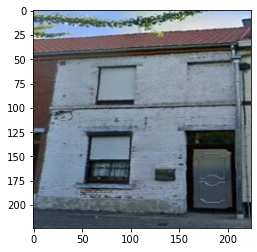

In [5]:
#read data 
#https://www.geeksforgeeks.org/convert-json-to-dictionary-in-python/
with open('/home/jupyter/large-dataset/_annotations.json') as json_file: 
    annot = json.load(json_file) 
data=[]
labels=[]
imagePaths = []
data_dir = "/home/jupyter/large-dataset/data-large"
for label in os.listdir(data_dir):
    for filename in os.listdir(os.path.sep.join([data_dir,label])):
        imagePath = os.path.sep.join([data_dir, label, filename])
        #image = cv2.imread(imagePath)
        for item in annot['annotations']:
            if item == filename: 
                x = annot['annotations'][item][0]['x']
                y = annot['annotations'][item][0]['y']
                x2 = annot['annotations'][item][0]['x2']
                y2 = annot['annotations'][item][0]['y2']
        image = load_img(imagePath)
        width, height = image.size 
        image = image.crop((x*width, y*height, x2*width, y2*height))
        image = image.resize((224,224))
        plt.imshow(image)
        path = os.path.sep.join(["/home/jupyter/large-dataset/data-large-cropped",label,filename])
        img_array = img_to_array(image)
        save_img(path, img_array)
        #image = np.array(image)
        #cv2.imwrite(path, image)
        #plt.savefig(os.path.sep.join(["/home/jupyter/large-dataset/train-data-large-cropped",label,filename]))
        image = img_to_array(image) / 255.0
        data.append(image)
        labels.append(label)
        imagePaths.append(path)
data = np.array(data)
labels = np.array(labels)
imagePaths = np.array(imagePaths)

In [6]:
print(imagePaths)

['/home/jupyter/large-dataset/data-large-cropped/Good/f6c330b9-82a4-474d-9849-a2accc2999ac.jpg'
 '/home/jupyter/large-dataset/data-large-cropped/Good/f83b25fb-02d6-4bf3-8de9-572758979a16.jpg'
 '/home/jupyter/large-dataset/data-large-cropped/Good/125c83db-bb42-407c-9ea6-57477d4d72aa.jpg'
 '/home/jupyter/large-dataset/data-large-cropped/Good/6ba275de-a23c-4a11-8187-34ac5b41e37a.jpg'
 '/home/jupyter/large-dataset/data-large-cropped/Good/d2726c88-a496-4617-a8eb-ee1716580e5f.jpg'
 '/home/jupyter/large-dataset/data-large-cropped/Good/0769fef7-2b38-4685-a8ee-2169d5dfa1ef.jpg'
 '/home/jupyter/large-dataset/data-large-cropped/Good/d9529a5e-f905-4b6d-97e1-96721b96e77d.jpg'
 '/home/jupyter/large-dataset/data-large-cropped/Good/efd57ba9-c223-44a9-87f2-ccfe7136b4be.jpg'
 '/home/jupyter/large-dataset/data-large-cropped/Good/ed9ab390-44d2-4c73-8be3-7d7fe10c1c74.jpg'
 '/home/jupyter/large-dataset/data-large-cropped/Good/c1fbd2dd-b814-4f01-9b44-fdef471a9a00.jpg'
 '/home/jupyter/large-dataset/data-large

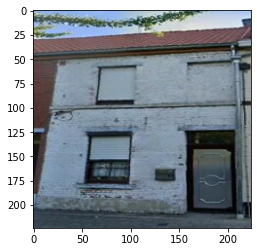

In [9]:
#read data 
#https://www.geeksforgeeks.org/convert-json-to-dictionary-in-python/
with open('/home/jupyter/large-dataset/_annotations.json') as json_file: 
    annot = json.load(json_file) 
data=[]
labels=[]
imagePaths = []
data_dir = "/home/jupyter/large-dataset/test-data-large"
for label in os.listdir(data_dir):
    for filename in os.listdir(os.path.sep.join([data_dir,label])):
        imagePath = os.path.sep.join([data_dir, label, filename])
        image = cv2.imread(imagePath)
        for item in annot['annotations']:
            if item == filename: 
                x = annot['annotations'][item][0]['x']
                y = annot['annotations'][item][0]['y']
                x2 = annot['annotations'][item][0]['x2']
                y2 = annot['annotations'][item][0]['y2']
        image = load_img(imagePath)
        width, height = image.size 
        image = image.crop((x*width, y*height, x2*width, y2*height))
        image = image.resize((224,224))
        plt.imshow(image)
        plt.savefig(os.path.sep.join(["/home/jupyter/large-dataset/test-data-large-cropped",label,filename]))


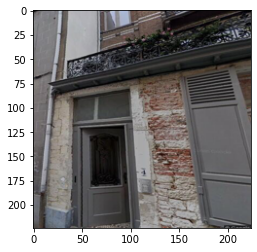

In [14]:
#read data 
#https://www.geeksforgeeks.org/convert-json-to-dictionary-in-python/
with open('/home/jupyter/large-dataset/_annotations.json') as json_file: 
    annot = json.load(json_file) 
data=[]
labels=[]
imagePaths = []
data_dir = "/home/jupyter/large-dataset/validation-data-large"
for label in os.listdir(data_dir):
    for filename in os.listdir(os.path.sep.join([data_dir,label])):
        imagePath = os.path.sep.join([data_dir, label, filename])
        image = cv2.imread(imagePath)
        for item in annot['annotations']:
            if item == filename: 
                x = annot['annotations'][item][0]['x']
                y = annot['annotations'][item][0]['y']
                x2 = annot['annotations'][item][0]['x2']
                y2 = annot['annotations'][item][0]['y2']
        image = load_img(imagePath)
        width, height = image.size 
        image = image.crop((x*width, y*height, x2*width, y2*height))
        image = image.resize((224,224))
        plt.imshow(image)
        plt.savefig(os.path.sep.join(["/home/jupyter/large-dataset/validation-data-large-cropped",label,filename]))


In [7]:
#splitting large dataset
#https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 70% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(imagePaths, labels, test_size=1 - train_ratio)

# test is now 15% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 



/home/jupyter/large-dataset/data-large/Good/efd57ba9-c223-44a9-87f2-ccfe7136b4be.jpg
True
/efd57ba9-c223-44a9-87f2-ccfe7136b4be.jpg
/home/jupyter/large-dataset/data-large/Bad/194e2ae3-2e51-41f6-abda-85ec169fc19d.jpg
/194e2ae3-2e51-41f6-abda-85ec169fc19d.jpg


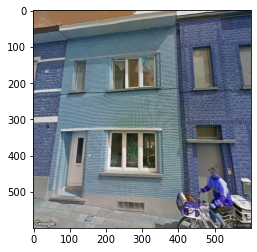

In [4]:
print(x_val[0])
print("Good" in x_val[0])
print(x_val[0][43:])
print(x_val[1])
print(x_val[1][42:])
plt.imshow(cv2.imread(x_val[0]))

/home/jupyter/large-dataset/data-large-cropped/Bad/c92558cb-4101-4fa6-b5ff-6fab0c999c76.jpg
/home/jupyter/large-dataset/validation-data-large
Bad
2558cb-4101-4fa6-b5ff-6fab0c999c76.jpg
/home/jupyter/large-dataset/validation-data-large/Bad/2558cb-4101-4fa6-b5ff-6fab0c999c76.jpg
/home/jupyter/large-dataset/data-large-cropped/Bad/c34d84d9-9009-4b08-a55c-2c38a08c0c93.jpg
/home/jupyter/large-dataset/validation-data-large
Bad
4d84d9-9009-4b08-a55c-2c38a08c0c93.jpg
/home/jupyter/large-dataset/validation-data-large/Bad/4d84d9-9009-4b08-a55c-2c38a08c0c93.jpg
/home/jupyter/large-dataset/data-large-cropped/Good/d72b9832-b21f-4e18-9c45-02e4d11eeabf.jpg
/home/jupyter/large-dataset/validation-data-large
Good
2b9832-b21f-4e18-9c45-02e4d11eeabf.jpg
/home/jupyter/large-dataset/validation-data-large/Good/2b9832-b21f-4e18-9c45-02e4d11eeabf.jpg
/home/jupyter/large-dataset/data-large-cropped/Good/fca8e317-e84b-48ee-b455-bd21f8275141.jpg
/home/jupyter/large-dataset/validation-data-large
Good
a8e317-e84b-48e

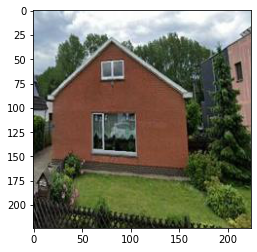

In [13]:
for image in x_val:
    filename="/home/jupyter/large-dataset/validation-data-large"
    print(image)
    #img = cv2.imread(image)
    img = load_img(image)
    plt.imshow(img)
    if "Good" in image:
        label = "Good"
        imagename = image[54:]
    elif "Bad" in image:
        label = "Bad"
        imagename = image[53:]
    path = os.path.sep.join([filename,label,imagename])
    print(filename)
    print(label)
    print(imagename)
    print(path)
    #cv2.imwrite(path , img)
    save_img(path, img)
    

/home/jupyter/large-dataset/data-large-cropped/Good/e827a0df-592e-4f19-be68-855a53e1fcd2.jpg
/home/jupyter/large-dataset/data-large-cropped/Good/a4595109-a76e-4f53-9972-ce0f19cacd01.jpg
/home/jupyter/large-dataset/data-large-cropped/Good/c2827f7c-a87c-49b3-a6ab-d21debb95396.jpg
/home/jupyter/large-dataset/data-large-cropped/Good/33cc36b2-0821-4122-adff-e5794f65a446.jpg
/home/jupyter/large-dataset/data-large-cropped/Good/1552b251-d633-4a1d-8ddb-310c42e90695.jpg
/home/jupyter/large-dataset/data-large-cropped/Good/91808450-d9ed-4d46-b58d-003857b57e40.jpg
/home/jupyter/large-dataset/data-large-cropped/Good/9f1f4cea-e997-4d2b-9b93-713fede232b9.jpg
/home/jupyter/large-dataset/data-large-cropped/Bad/c1fc9e49-433f-4a00-8ebf-18eeb2239b9c.jpg
/home/jupyter/large-dataset/data-large-cropped/Good/2c415240-1608-45e9-b91f-1e98b13f54ce.jpg
/home/jupyter/large-dataset/data-large-cropped/Good/ab1efb03-dfa0-4f26-a8e9-ec5188ef628f.jpg
/home/jupyter/large-dataset/data-large-cropped/Bad/4bcf118f-abf6-4297-8

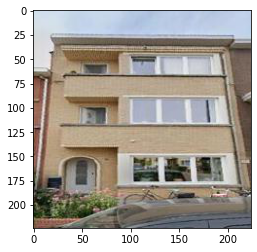

In [20]:
for image in x_test:
    filename="/home/jupyter/large-dataset/test-data-large"
    print(image)
    #img = cv2.imread(image)
    img = load_img(image)
    plt.imshow(img)
    if "Good" in image:
        label = "Good"
        imagename = image[54:]
    elif "Bad" in image:
        label = "Bad"
        imagename = image[53:]
    path = os.path.sep.join([filename,label,imagename])
    #cv2.imwrite(path , img)
    save_img(path, img)
    

/home/jupyter/large-dataset/data-large-cropped/Good/9759251f-61bf-49ca-ba41-6fc29dc0d815.jpg
/home/jupyter/large-dataset/data-large-cropped/Good/cd83f000-b3df-498a-be04-32fbedfd883e.jpg
/home/jupyter/large-dataset/data-large-cropped/Good/577dbc4b-f579-45dd-8f8e-2249bd759078.jpg
/home/jupyter/large-dataset/data-large-cropped/Good/4a4164d3-0c97-47b9-8c99-756847f3f66e.jpg
/home/jupyter/large-dataset/data-large-cropped/Good/f63329f5-4dbe-4ac8-9d3d-6d8a12b52cc7.jpg
/home/jupyter/large-dataset/data-large-cropped/Good/ab57a70f-43ba-4f9b-a5e7-21911e5947b6.jpg
/home/jupyter/large-dataset/data-large-cropped/Bad/30407e6e-dd36-4281-9d28-6d495d8f132f.jpg
/home/jupyter/large-dataset/data-large-cropped/Good/2625bc13-d902-40e2-9e65-673090ce455a.jpg
/home/jupyter/large-dataset/data-large-cropped/Good/fc1be882-da9f-4d7b-8a25-40cf3d0cf90e.jpg
/home/jupyter/large-dataset/data-large-cropped/Good/533f8e03-0a14-4aab-b678-86243f94fd62.jpg
/home/jupyter/large-dataset/data-large-cropped/Bad/79f2dcb6-0131-423f-8

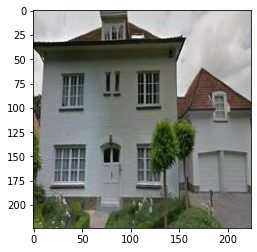

In [21]:
for image in x_train:
    filename="/home/jupyter/large-dataset/train-data-large"
    print(image)
    #img = cv2.imread(image)
    img = load_img(image)
    plt.imshow(img)
    if "Good" in image:
        label = "Good"
        imagename = image[54:]
    elif "Bad" in image:
        label = "Bad"
        imagename = image[53:]
    path = os.path.sep.join([filename,label,imagename])
    #cv2.imwrite(path , img)
    save_img(path, img)
    

In [11]:
for image in x_test:
    filename="/home/jupyter/large-dataset/test-data-large"
    img = cv2.imread(image)
    if "Good" in image:
        label = "Good"
        imagename = image[44:]
    elif "Bad" in image:
        label = "Bad"
        imagename = image[43:]
    path = os.path.sep.join([filename,label,imagename])
    cv2.imwrite(path , img)

/home/jupyter/large-dataset/data-large/Good/25668291-7b91-437a-88ad-a3c1dd3637c0.jpg
/home/jupyter/large-dataset/train-data-large/Good/25668291-7b91-437a-88ad-a3c1dd3637c0.jpg
/home/jupyter/large-dataset/data-large/Good/666e3074-51ee-487a-a0b4-6ef30df2ccf3.jpg
/home/jupyter/large-dataset/train-data-large/Good/666e3074-51ee-487a-a0b4-6ef30df2ccf3.jpg
/home/jupyter/large-dataset/data-large/Good/9097c7e8-a7b7-4a6c-a5d0-db1acbcfbb69.jpg
/home/jupyter/large-dataset/train-data-large/Good/9097c7e8-a7b7-4a6c-a5d0-db1acbcfbb69.jpg
/home/jupyter/large-dataset/data-large/Good/9aeef929-785b-4644-9467-46757d9d562a.jpg
/home/jupyter/large-dataset/train-data-large/Good/9aeef929-785b-4644-9467-46757d9d562a.jpg
/home/jupyter/large-dataset/data-large/Bad/8d4877a2-5132-405f-9af5-17c8097780bc.jpg
/home/jupyter/large-dataset/train-data-large/Bad/8d4877a2-5132-405f-9af5-17c8097780bc.jpg
/home/jupyter/large-dataset/data-large/Bad/039cb1f9-efaa-404c-9bb0-644f307d476f.jpg
/home/jupyter/large-dataset/train-data

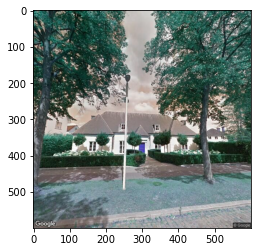

In [12]:
for image in x_train:
    filename="/home/jupyter/large-dataset/train-data-large"
    print(image)
    img = cv2.imread(image)
    plt.imshow(img)
    if "Good" in image:
        label = "Good"
        imagename = image[44:]
    elif "Bad" in image:
        label = "Bad"
        imagename = image[43:]
    path = os.path.sep.join([filename,label,imagename])
    print(path)
    cv2.imwrite(path , img)

data augmentation

In [26]:
import tensorflow as tf

IMAGE_SIZE=(224,224)
data_dir = '/home/jupyter/large-dataset/train-data-large/'
datagen_kwargs = dict(rescale=1./255, dtype = 'float32')
dataflow_kwargs = dict(target_size=IMAGE_SIZE, batch_size=500,
                   interpolation="bilinear")
#valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
 #   **datagen_kwargs)
#valid_generator = valid_datagen.flow_from_directory(
 #   data_dir, subset="validation", shuffle=False, **dataflow_kwargs)

for label in ["Good", "Bad"]:
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      horizontal_flip=True,
      shear_range=15, zoom_range=[1.0,1.5],
      brightness_range = [0.5, 1.5],
        channel_shift_range=75.0,
      **datagen_kwargs)
    train_generator = train_datagen.flow_from_directory(
    data_dir, shuffle=True, **dataflow_kwargs, save_to_dir="/home/jupyter/large-dataset/train-augmented-data-large/"+label, save_format="jpg", classes=[label])
    batch = next(train_generator)

Found 333 images belonging to 1 classes.
Found 123 images belonging to 1 classes.


In [27]:
label="Bad"
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      horizontal_flip=True,
      shear_range=15, zoom_range=[1.0,1.5],
      brightness_range = [0.5, 1.5],
        channel_shift_range=75.0,
      **datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    data_dir, shuffle=True, **dataflow_kwargs, save_to_dir="/home/jupyter/large-dataset/train-augmented-data-large/"+label, save_format="jpg", classes=[label])
batch = next(train_generator)

Found 123 images belonging to 1 classes.


In [18]:
label="Bad"
for filename in os.listdir(os.path.sep.join([aug_data_dir,label])):
    imagePath = os.path.sep.join([direct, label, filename])
    image = cv2.imread(imagePath)
    image = load_img(imagePath, target_size=(224, 224))
    image.save(os.path.sep.join([comp_dir, "augmented", label, filename]), optimize=True, quality=30) 

In [22]:
print(len(os.listdir('/home/jupyter/large-dataset/train-data-large/Bad')))
print(len(os.listdir('/home/jupyter/large-dataset/train-data-large/Good')))

122
333


In [8]:
print(len(os.listdir('/home/jupyter/large-dataset/train-data-large-cropped/Bad')))
print(len(os.listdir('/home/jupyter/large-dataset/train-data-large-cropped/Good')))

128
328


In [23]:
print(len(os.listdir('/home/jupyter/large-dataset/validation-data-large/Bad')))
print(len(os.listdir('/home/jupyter/large-dataset/validation-data-large/Good')))

28
71


In [15]:
print(len(os.listdir('/home/jupyter/large-dataset/validation-data-large-cropped/Bad')))
print(len(os.listdir('/home/jupyter/large-dataset/validation-data-large-cropped/Good')))

17
81


In [24]:
print(len(os.listdir('/home/jupyter/large-dataset/test-data-large/Bad')))
print(len(os.listdir('/home/jupyter/large-dataset/test-data-large/Good')))

25
73


In [10]:
print(len(os.listdir('/home/jupyter/large-dataset/test-data-large-cropped/Bad')))
print(len(os.listdir('/home/jupyter/large-dataset/test-data-large-cropped/Good')))

30
68


In [20]:
print(len(os.listdir('/home/jupyter/large-dataset/data-large/Bad')))
print(len(os.listdir('/home/jupyter/large-dataset/data-large/Good')))

175
476


In [3]:
print(len(os.listdir('/home/jupyter/large-dataset/data-large-cropped/Bad')))
print(len(os.listdir('/home/jupyter/large-dataset/data-large-cropped/Good')))

176
476


In [3]:
print(len(os.listdir('/home/jupyter/large-dataset/train-augmented-data-large/Bad')))
print(len(os.listdir('/home/jupyter/large-dataset/train-augmented-data-large/Good')))

256
327


In [4]:
print(len(os.listdir('/home/jupyter/data/Bad')))
print(len(os.listdir('/home/jupyter/data/Good')))

87
238


In [28]:
print(len(os.listdir('/home/jupyter/large-dataset/train-augmented-data-large/Bad')))
print(len(os.listdir('/home/jupyter/large-dataset/train-augmented-data-large/Good')))

246
333
